<a href="https://colab.research.google.com/github/binodpun/Data-Science-with-python/blob/main/Linear_regression_ds1100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("/content/Salary Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# About Dataset
This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.
Columns:
* Age: This column represents the age of each employee in years. The values in this column are numeric.
* Gender: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.
* Education Level: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.
* Job Title: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.
* Years of Experience: This column represents the number of years of work experience of each employee. The values in this column are numeric.
* Salary: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.
** The purpose of creating this dataset is solely for educational use, and any commercial use is strictly prohibited
and this dataset was large language models generated and not collected from actual data sources.

# Data Profiling and inspection

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


* no. of rows: 375 rows
* columns : 6 columns
* out of 375 rows 373 rows are not null which means each column has two missing rows

In [7]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [8]:
df.loc[df.isna().any(axis='columns')]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizing missing data

In [9]:
df.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
Age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gender,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Education Level,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Job Title,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Years of Experience,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Salary,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

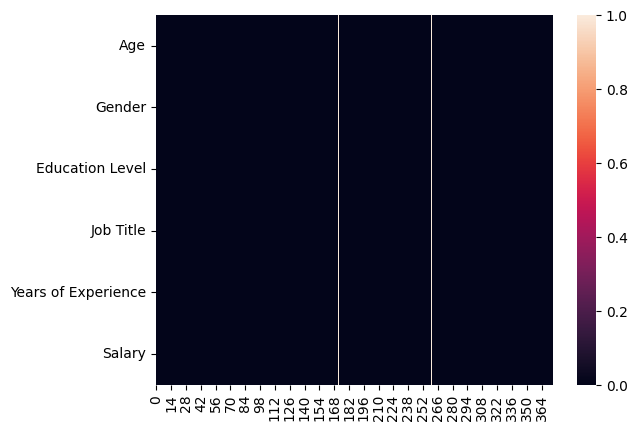

In [10]:
sns.heatmap(df.isna().transpose())

# Numerical data analysis

In [11]:
df.describe() # Descriptive statistics

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [12]:
df.describe(include='object')

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


# Exploratory data analysis(EDA)

* In the company most of the employee are Male with 194 count
* In the company most of the employee have Bachelor's degree with 244 count
* In the company most employee has title Director of marketing with count 12

In [13]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [14]:
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Count'>

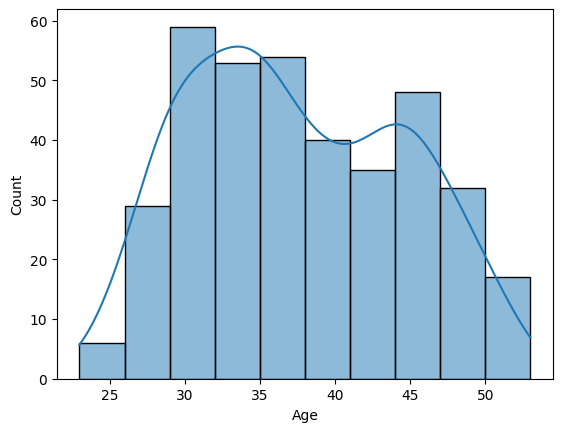

In [15]:
sns.histplot(df['Age'], kde= True)

<Axes: ylabel='Age'>

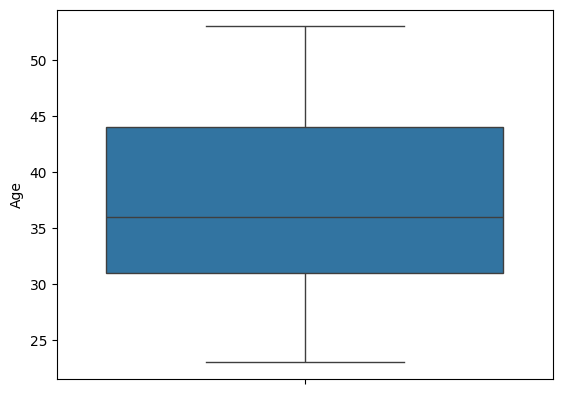

In [16]:
sns.boxplot(df['Age'])

<Axes: xlabel='Years of Experience', ylabel='Count'>

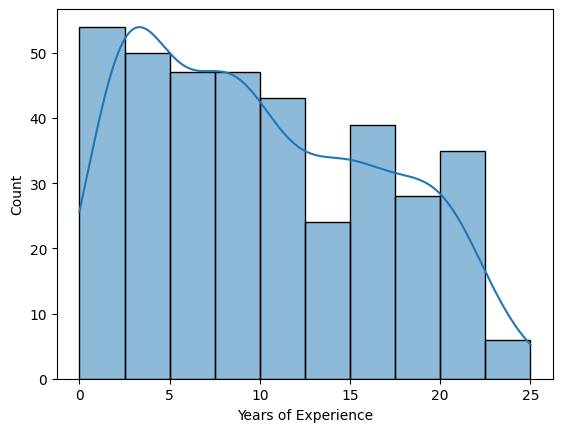

In [17]:
sns.histplot(df['Years of Experience'], kde='True')

From the graph, we can make the following observations:

* There is a high count of individuals with 0-5 years of experience.
*The count decreases as years of experience increase, with some fluctuations.
*There is a noticeable dip in the count around 10-15 years of experience.
*The count rises slightly again around 15-20 years before dropping off significantly towards 25 years of experience.

<Axes: ylabel='Years of Experience'>

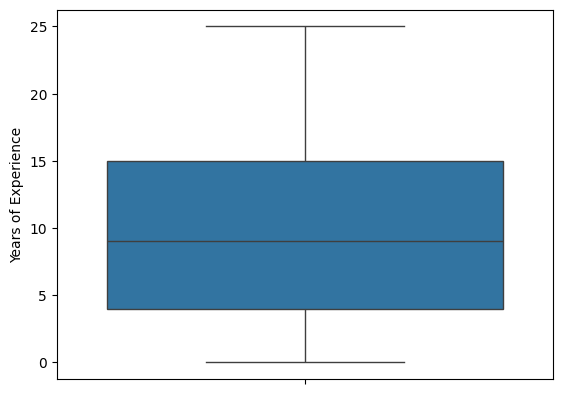

In [20]:
sns.boxplot(df['Years of Experience'])

<Axes: xlabel='Salary', ylabel='Count'>

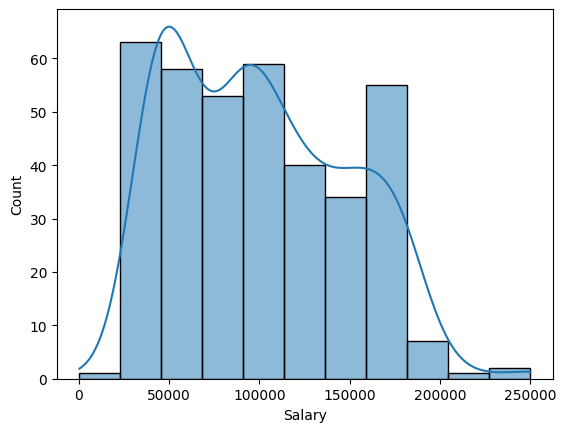

In [21]:
sns.histplot(df['Salary'], kde='True')

<Axes: ylabel='Salary'>

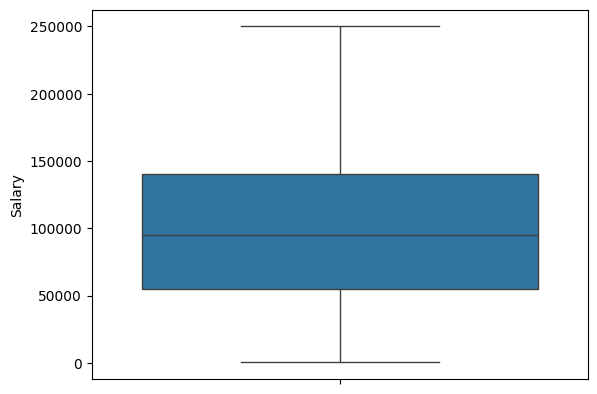

In [22]:
sns.boxplot(df['Salary'])

### we want to predict Salary. It is a dependent variable. Salary is a continous data. To predict continous data we use linear regression()

# Assumption of linear Regression:

There are four assumptions associated with a linear regression model:

Linearity: The relationship between X and the mean of Y is linear.
Homoscedasticity: The variance of residual is the same for any value of X.
Independence: Observations are independent of each other.
Normality: For any fixed value of X, Y is normally distributed.

# Feature selection using Correlation plot

In [ ]:
# correlation is used to check linearity

<Axes: >

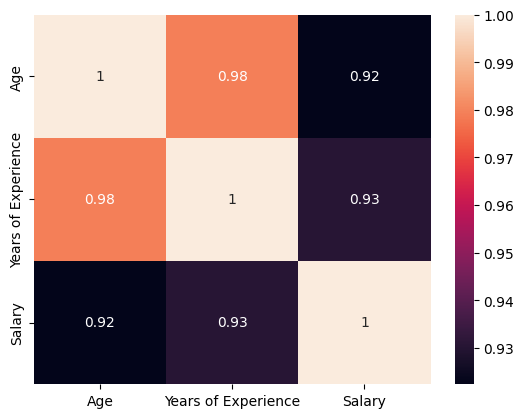

In [30]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True)

* The above heatmap shows Salary is positively correlated with Age and Years of Experience with value 0.92 and 0.93 respectively.

* The plot also shows there is correlation between Age and Years of Experience.
* In our data we want to predict Salary using Age and Years of Experience is independent variable.
* The assumption of Linear regression 'Independence' the independent variable should not be correlated. In our case Years of Experience and Age are Independent variable and they are correlated. This is a problem of multicolinarity. In such a case we have to one column.
* Which one to drop? We should drop Age column because it is on readily available in inference time. It is easier to ask Years of experience instead of age.

<Axes: xlabel='Age', ylabel='Salary'>

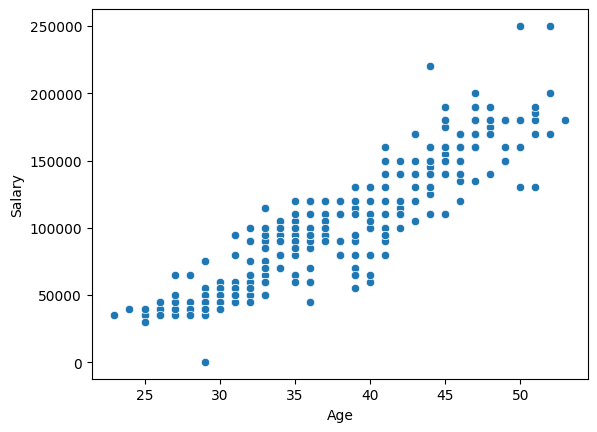

In [28]:
sns.scatterplot(x=df['Age'], y=df['Salary'])

<Axes: xlabel='Years of Experience', ylabel='Salary'>

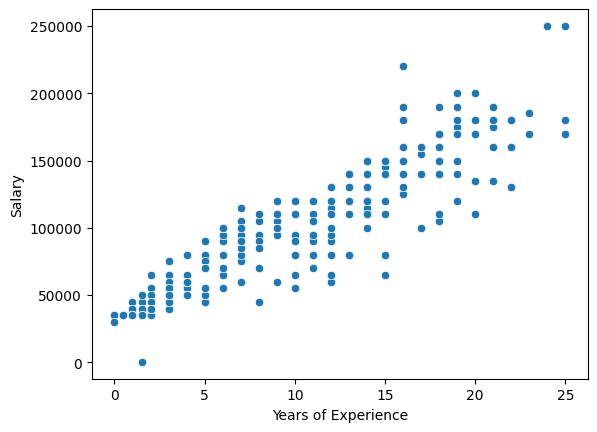

In [29]:
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'])

# # Missing data Handling
## Deletion
* row: if target or label(y) is missing; if entire row is missing we drop the row
* column: If a column contains >70% data missing we drop column.
## Imputation (fill in missing value):
* mean: data (column) has no outliers and normally distributed --use mean to fill in missing data
* median: if data(column) has outlier use median to fill in missing data
* mode: if data(column) is categorical and data is missing we use mode to fill in missing data.
## Mathematical Technique
* Interpolation and Extrapolation
## Algorithms
* MICE
* IterativeImputer
* LinearRegression
* RandomForest
* KNN
## EDA and Domain knowledge
In our case entire row is missing so we drop the rows.

In [31]:
df.dropna(inplace=True) # drop rows with missing data

In [32]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# Selecting dependent and independent variable

In [33]:
x = df.loc[:, ['Years of Experience']] # X sadhi 2D or DataFrame ma hunxa
y = df.Salary # y sadhai 1D or pandas Series ma hunxa

<Axes: xlabel='Years of Experience', ylabel='Salary'>

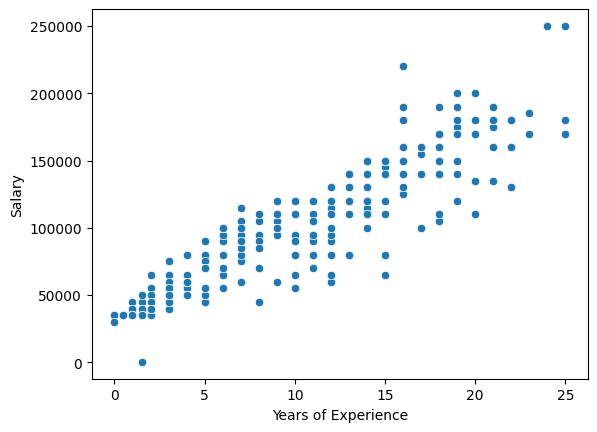

In [36]:
sns.scatterplot(x=x['Years of Experience'], y=y)